# Types of Scaling or Transformation
```
Normalizatio and 
1.Standard Scaler
```
```
MinMax
```
```
Logarithmic
```
``` 
Reciprocal
```
```
Square Root
```
```
Exponential
```
```
Box Cox
```

### 1. Standardization

##### Centering the variable to zero.
##### try to make mean=0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=sns.load_dataset('titanic')
df=df[['survived','pclass','age','fare']]
df.head()


,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df['age'].fillna(df.age.median(), inplace=True)
df.age.isnull().sum()

0

### 1. Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
scaled_df=pd.DataFrame(df_scaled)
scaled_df

,0,1,2,3
0,-0.789272,0.827377,-0.530377,-0.502445
1,1.266990,-1.566107,0.571831,0.786845
2,1.266990,0.827377,-0.254825,-0.488854
3,1.266990,-1.566107,0.365167,0.420730
4,-0.789272,0.827377,0.365167,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.185937,-0.386671
887,1.266990,-1.566107,-0.737041,-0.044381
888,-0.789272,0.827377,NaN,-0.176263
889,1.266990,-1.566107,-0.254825,-0.044381


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

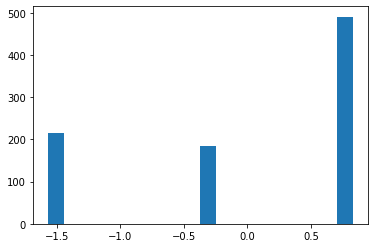

In [ ]:
plt.hist(scaled_df.iloc[:,1],bins=20)

## Min Max Scaler

## Robust Scaler

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

## Gaussian Transformation

#####  It is used to convert the data to be normally distributed

In [ ]:
df=sns.load_dataset('titanic')
df=df[['survived','age','fare']]
df.head()


,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.age=df.age.fillna(df.age.median())
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [ ]:
# If you want to check whether feature is gaussian distributed and
# or normally distributed then we use Q-Q plot

In [ ]:
import  scipy.stats as stat
import pylab

In [ ]:
def plot_data(df,feature):
  plt.figure(figsize=(18,8))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(122)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()


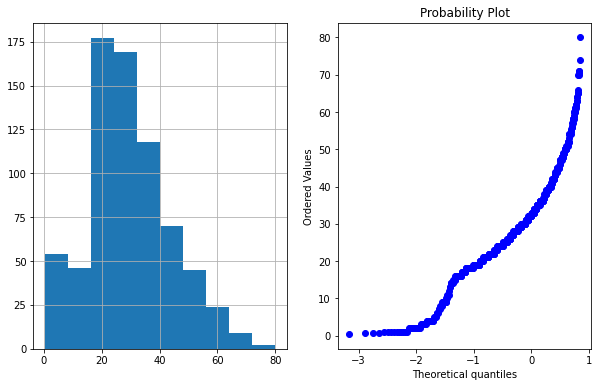

In [ ]:
plot_data(df,'age')

### Logarithmic Transformation

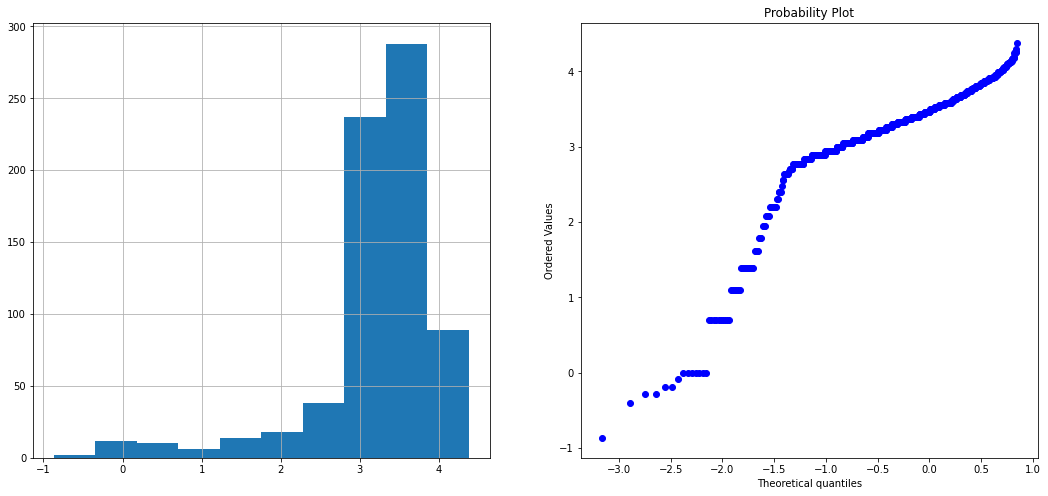

In [ ]:
import numpy as np
df['Age_log']=np.log(df['age'])
plot_data(df,'Age_log')

###### This is not a good Transformation because it is not following a normal distribution patter

### Reciprocal Transformation

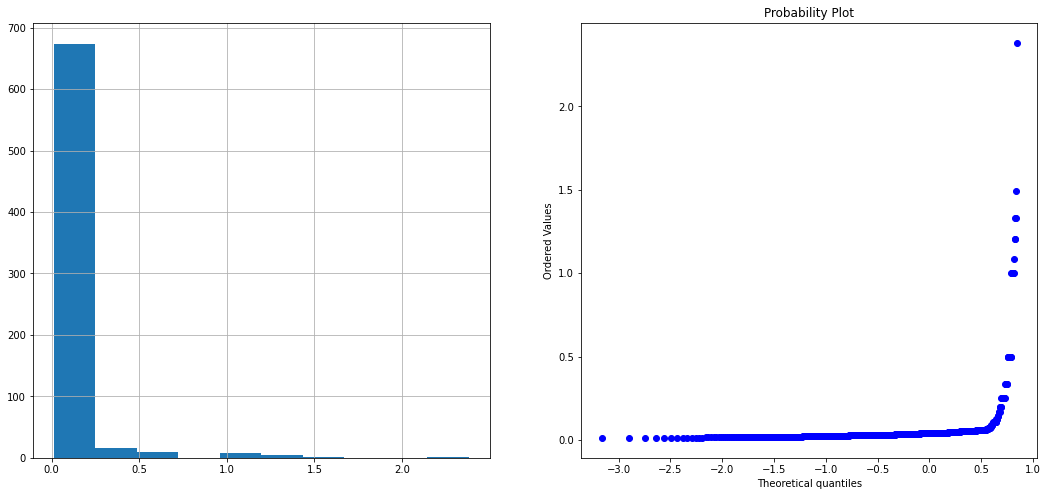

In [ ]:
df['age_reciprocal']=1/df.age
plot_data(df,'age_reciprocal')

### Square Root Transformation

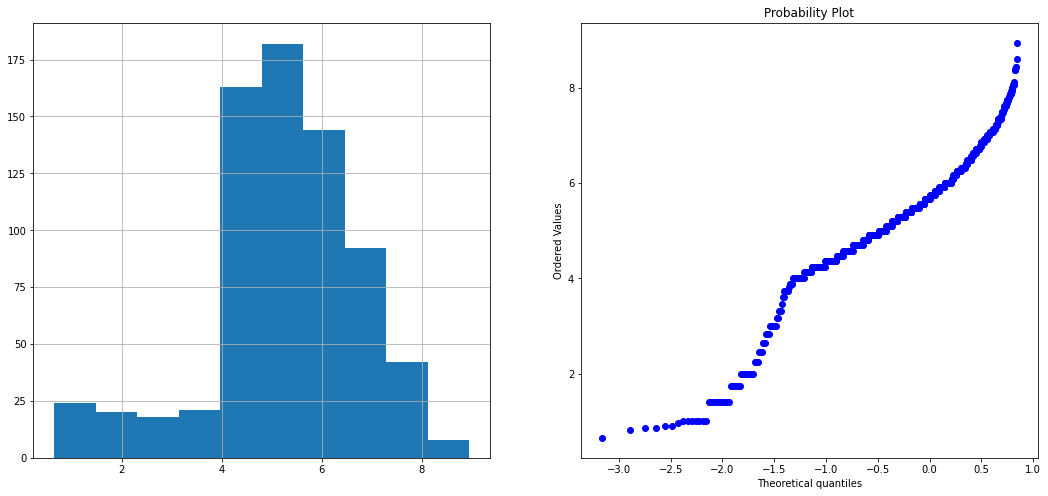

In [ ]:
df['age_sqrt']=df.age**(1/2)
plot_data(df,'age_sqrt')

### Exponential Tranformation

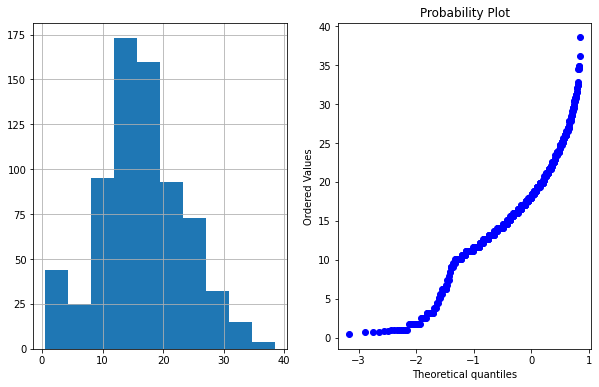

In [ ]:
df['age_exponential']=df['age']**(1/1.2)
plot_data(df,'age_exponential')

## Box-Cox Transformation



##### The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [ ]:
df['age_boxcox'],parameters=stat.boxcox(df['age'])

In [ ]:
print(parameters)

8.472135811722177


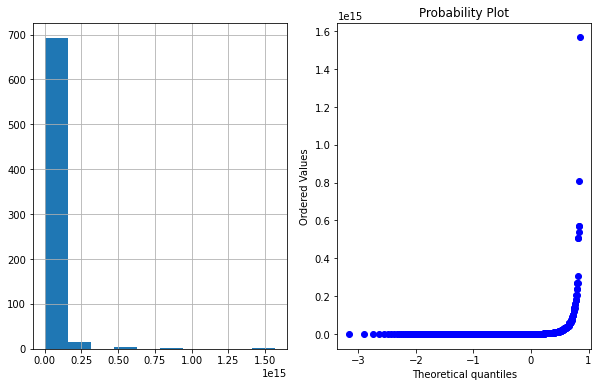

In [ ]:
plot_data(df,'age_boxcox')

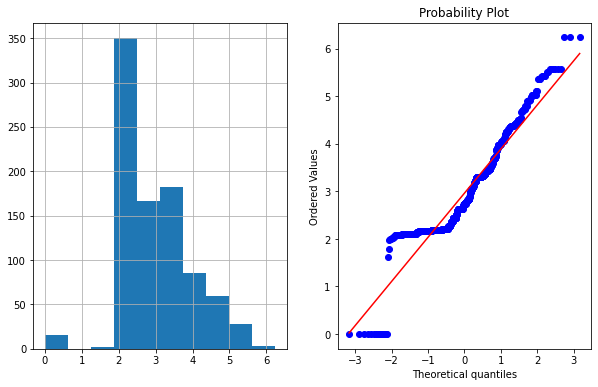

In [ ]:
#### Fare
df['Fare_log']=np.log1p(df['fare'])
plot_data(df,'Fare_log')

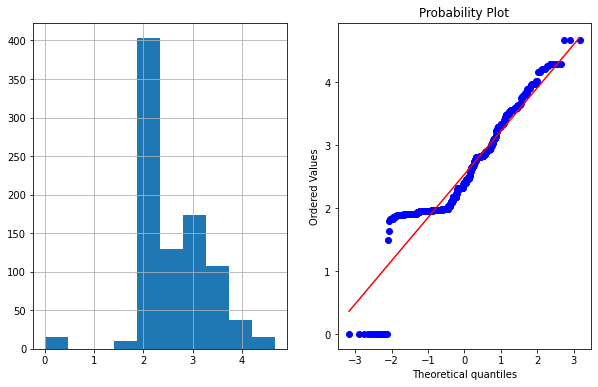

In [ ]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['fare']+1)
plot_data(df,'Fare_Boxcox')